In [25]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib notebook

In [3]:
df = pd.read_csv("./data/BlackFriday.csv")

In [8]:
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

In [12]:
df["product_category_3"].value_counts().sort_index()

3.0       600
4.0      1840
5.0     16380
6.0      4818
8.0     12384
9.0     11414
10.0     1698
11.0     1773
12.0     9094
13.0     5385
14.0    18121
15.0    27611
16.0    32148
17.0    16449
18.0     4563
Name: product_category_3, dtype: int64

In [13]:
df["product_category_2"] = df["product_category_2"].fillna(0)
df["product_category_3"] = df["product_category_3"].fillna(0)

In [15]:
df["product_id"].value_counts()

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00145042    1384
P00059442    1384
P00237542    1374
P00255842    1354
P00117942    1346
P00110942    1336
P00010742    1331
P00110842    1260
P00220442    1253
P00051442    1233
P00102642    1228
P00117442    1227
P00278642    1213
P00242742    1194
P00034742    1188
P00080342    1186
P00148642    1179
P00028842    1172
P00031042    1168
P00251242    1167
P00114942    1162
P00270942    1141
             ... 
P00307042       1
P00172642       1
P00056642       1
P00133042       1
P00065542       1
P00081342       1
P00203642       1
P00068342       1
P00074842       1
P00144942       1
P00260742       1
P00063642       1
P00315242       1
P00299342       1
P00348142       1
P00073342       1
P00059342       1
P00298342       1
P00107842       1
P00012942       1
P00069642       1
P00051742       1
P00083142       1
P00072042       1
P00305542 

In [17]:
transaction_count = df["user_id"].value_counts()

<IPython.core.display.Javascript object>


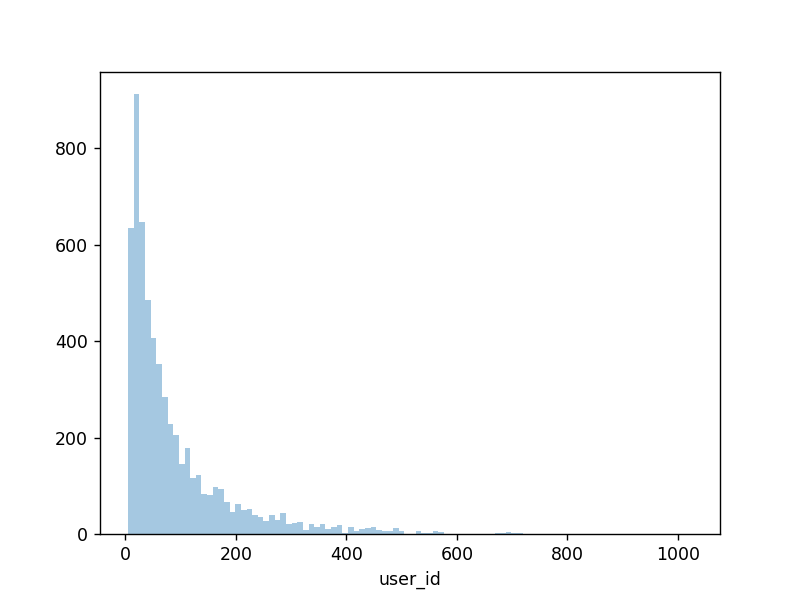

In [27]:
plt.figure()
sns.distplot(transaction_count, bins=100, kde=False)
plt.show()

In [28]:
age_counts = df["age"].value_counts().sort_index()
age_counts

0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
Name: age, dtype: int64

<IPython.core.display.Javascript object>


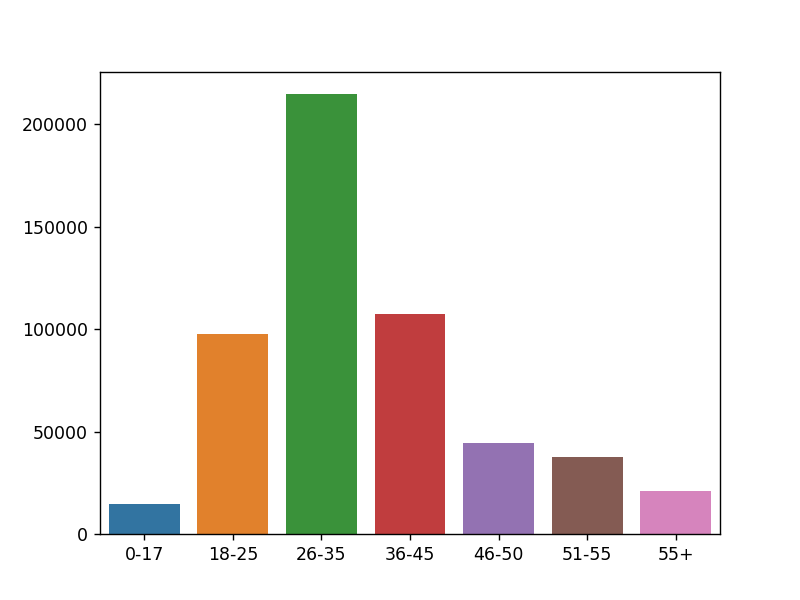

In [29]:
plt.figure()
sns.barplot(age_counts.index, age_counts.values)
plt.show()

In [32]:
spent_by_age = df.groupby("age")["purchase"].apply(np.mean)
spent_by_age

age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: purchase, dtype: float64

<IPython.core.display.Javascript object>


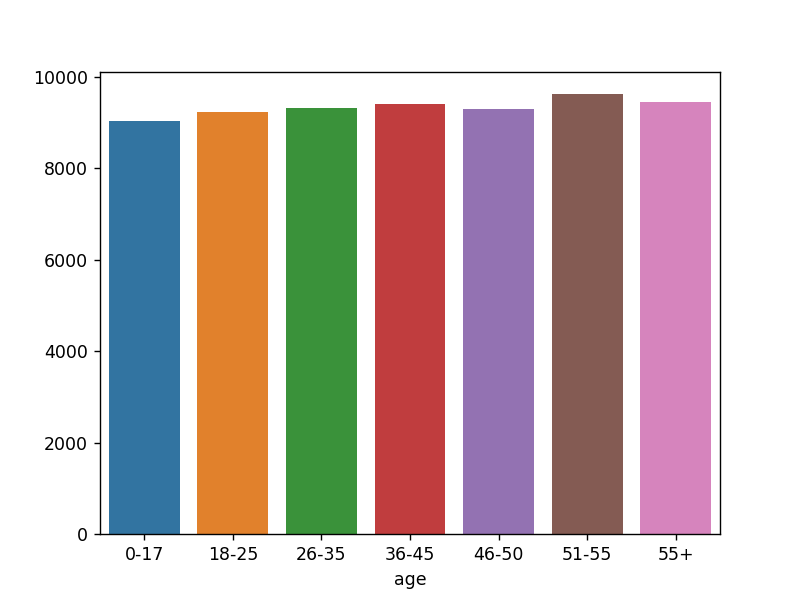

In [33]:
plt.figure()
sns.barplot(spent_by_age.index, spent_by_age.values)
plt.show()

In [34]:
city_srs = df["city_category"].value_counts()
city_srs

B    226493
C    166446
A    144638
Name: city_category, dtype: int64

<IPython.core.display.Javascript object>


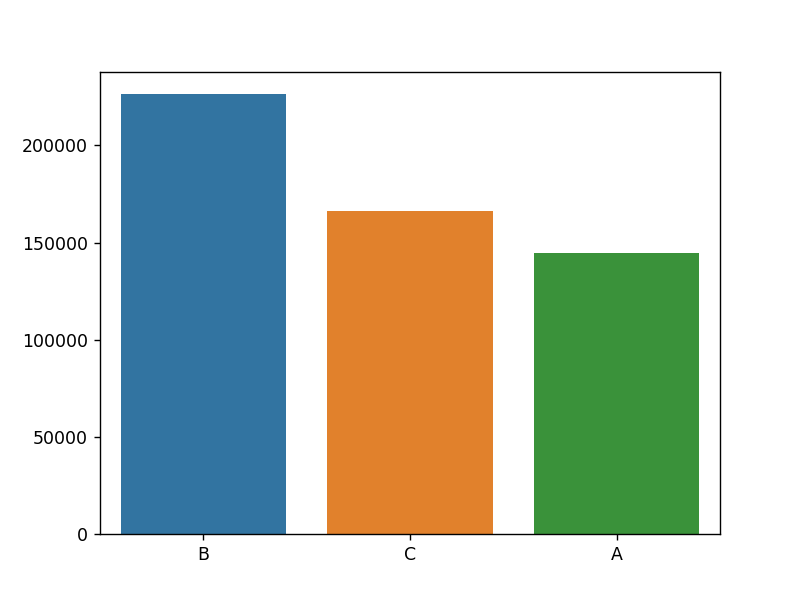

In [35]:
plt.figure()
sns.barplot(city_srs.index, city_srs.values)
plt.show()

In [45]:
srs_purchase_sum = df.groupby("user_id")["purchase"].apply(np.sum).reset_index()
srs_categories = df.groupby("user_id")[
    ["age", "marital_status", "gender", "city_category", "stay_in_current_city_years"]].apply(np.max).reset_index()

df_unique = srs_purchase_sum.merge(srs_categories, on="user_id").sort_values("age")

In [46]:
df_unique.head()

,user_id,purchase,age,marital_status,gender,city_category,stay_in_current_city_years
0,1000001,333481,0-17,0,F,A,2
1873,1001929,112864,0-17,0,F,A,0
4458,1004572,630789,0-17,0,F,C,0
4461,1004575,365760,0-17,0,F,C,2
1872,1001928,1324537,0-17,0,M,B,1


<IPython.core.display.Javascript object>


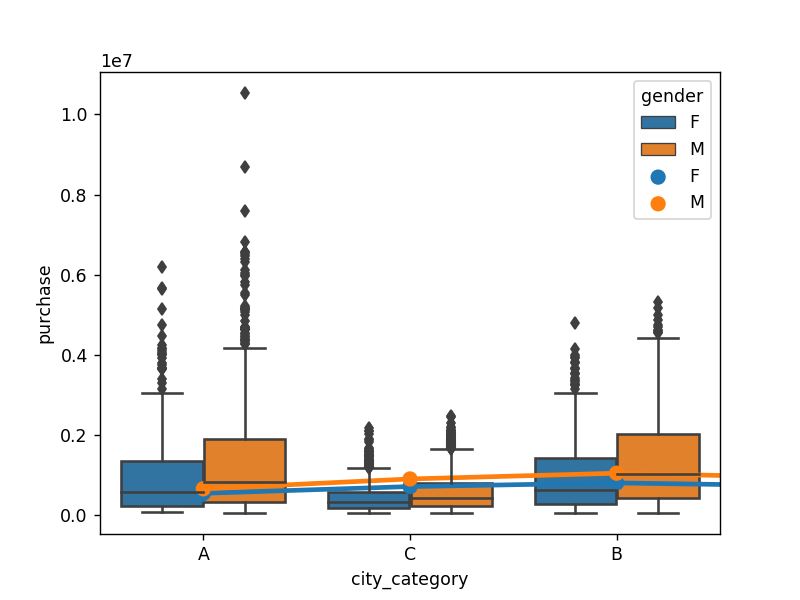

In [47]:
plt.figure()
sns.pointplot(x="age", y="purchase", hue="gender", data=df_unique)
plt.show()

<IPython.core.display.Javascript object>


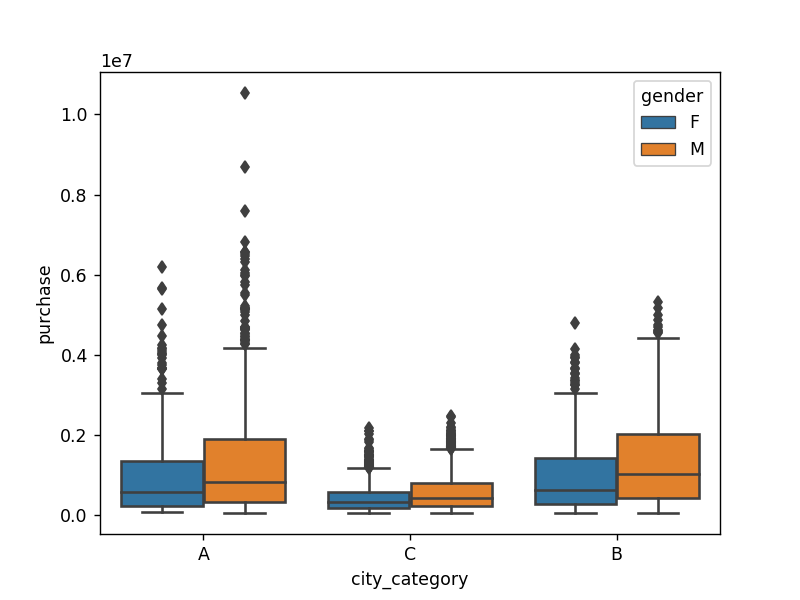

In [51]:
plt.figure()
sns.boxplot(x="city_category", y="purchase", hue="gender", data=df_unique)
plt.show()

In [53]:
product_count = df.groupby("product_id").apply(len).reset_index()
product_price = df.groupby("product_id")["purchase"].apply(lambda x: np.mean(x)).reset_index()

df_product = product_count.merge(product_price, on="product_id")
df_product.columns= ["product_id", "purchase_count", "avg_price"]
df_product.head()

,product_id,purchase_count,avg_price
0,P00000142,1130,11143.507080
1,P00000242,371,10552.293801
2,P00000342,238,5299.928571
3,P00000442,92,4795.358696
4,P00000542,146,5419.308219


<IPython.core.display.Javascript object>


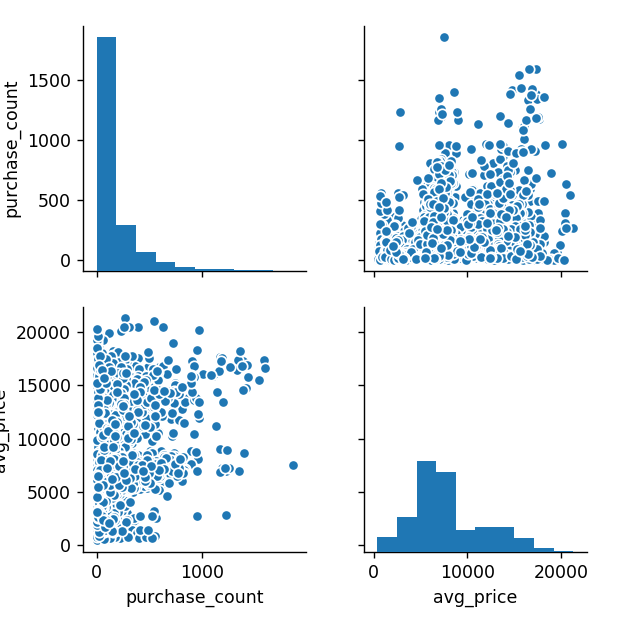

In [55]:
sns.pairplot(df_product[["purchase_count", "avg_price"]])
plt.show()

<IPython.core.display.Javascript object>


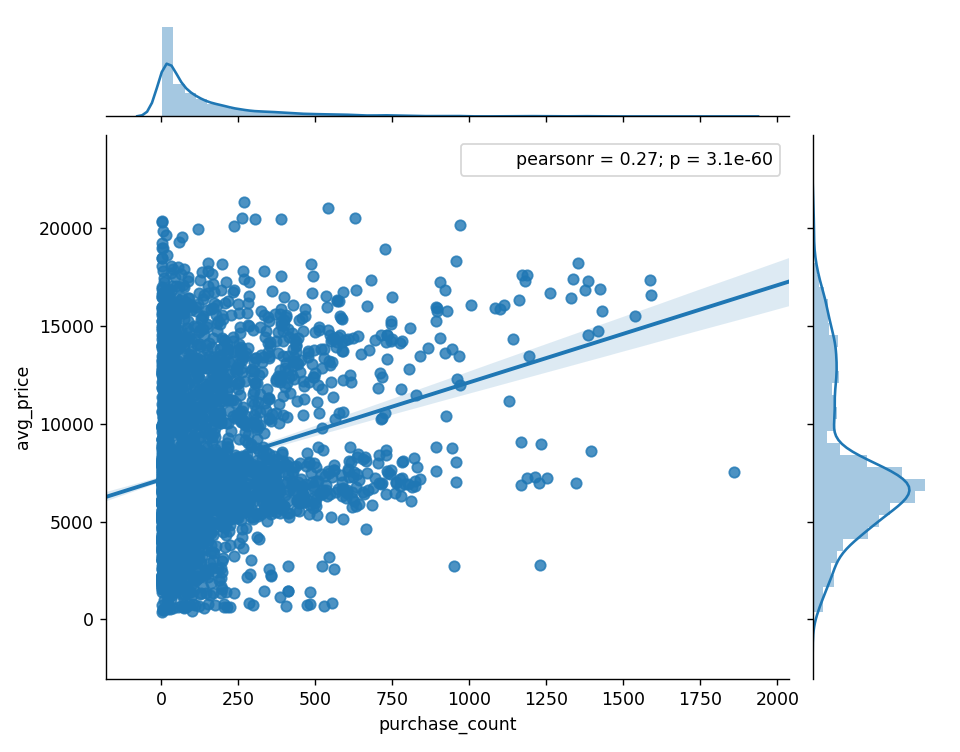

In [56]:
sns.jointplot(x="purchase_count", y="avg_price", data=df_product, kind="reg")